In [24]:
# Imports
import pandas as pd
import csv
from datetime import date, timedelta
import folium
import requests
from folium import Marker
from folium.plugins import MarkerCluster
import math
import matplotlib.pyplot as plt
import seaborn as sns
from requests.auth import HTTPBasicAuth
import json
from pandas import json_normalize
import pandas
import numpy as np

In [25]:
#opens json data for vaccine administration for US states and territories
with open('vaccine_admin.json') as f:
    vaccine_admin_json=json.load(f)



In [26]:
#formats the json data into a dataframe
vaccine_admin_df= vaccine_admin_json['vaccination_data']
us_vaccine_admin_df=json_normalize(vaccine_admin_df)

#removes the first row for the general US, unless wanted, I can put it back

us_vaccine_admin_df=us_vaccine_admin_df.iloc[1:,:]

#removes the first column which includes the date
us_vaccine_admin_df=us_vaccine_admin_df.iloc[:,1:]

us_vaccine_admin_df



,Location,ShortName,LongName,Census2019,date_type,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,...,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf
1,AK,AKA,Alaska,731545,Report,1125115,847207,153800,115811,323201,...,26282,15.6,36947,10.4,15901,21.2,NaN,NaN,NaN,NaN
2,AL,ALA,Alabama,4903185,Report,6999770,4732829,142760,96526,2049081,...,113302,9.1,134294,6.5,85455,13.2,NaN,NaN,NaN,NaN
3,AR,ARA,Arkansas,3017804,Report,4256950,3161353,141061,104757,1330606,...,75840,10.1,95807,7.2,56253,14.4,NaN,NaN,NaN,NaN
4,AS,ASA,American Samoa,55689,Report,68550,65441,123094,117512,17918,...,8,0.0,16,0.0,1,0.0,NaN,NaN,NaN,NaN
5,AZ,AZA,Arizona,7278717,Report,10410270,8578327,143023,117855,3396918,...,196536,10.1,234139,6.5,152772,14.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,VT,VTA,Vermont,623989,Report,1120670,946774,179598,151729,363314,...,34214,14.5,39009,9.4,28478,23.5,NaN,NaN,NaN,NaN
60,WA,WAA,Washington,7614893,Report,11999595,10055713,157581,132053,3733446,...,260093,11.8,316967,7.0,200854,18.6,NaN,NaN,NaN,NaN
61,WI,WIA,Wisconsin,5822434,Report,7923035,7141619,136078,122657,2683589,...,229763,12.7,278437,8.8,181242,19.4,NaN,NaN,NaN,NaN
62,WV,WVA,West Virginia,1792147,Report,3079635,1583779,171841,88373,702426,...,32630,7.2,39889,5.6,23079,8.7,NaN,NaN,NaN,NaN


In [27]:
#removes unnecessary columns, columns with no value, and columns with unknown information
us_vaccine_admin_df
us_vaccine_admin_df.drop(
            labels=['date_type','ShortName','Administered_Unk_Manuf','Distributed_Unk_Manuf','Series_Complete_Unk_Manuf',
            'Series_Complete_Unk_Manuf_18Plus','Series_Complete_Unk_Manuf_65Plus',
            'Series_Complete_Yes','Administered_65Plus_Entity','Series_Complete_Unk_Manuf_12Plus',
            'Administered_12Plus_Entity','Additional_Doses_Moderna','Additional_Doses_Pfizer',
            'Additional_Doses_Janssen','Additional_Doses_Unk_Manuf'],
            axis=1,
            inplace=True
            )

In [28]:
#removes us territories from dataframe
us_vaccine_admin_df.drop(
            labels=[4,6,11,
            14,16,20,
            29,33,48,
            50, 57, 58],
            axis=0,
            inplace=True
            )


In [29]:
#resets index
us_vaccine_admin_df=us_vaccine_admin_df.reset_index(drop=True)
us_vaccine_admin_df

,Location,LongName,Census2019,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,Administered_Pfizer,Administered_Janssen,...,Series_Complete_Janssen_12Plus,Count_70pct_vacc,additional_doses,Additional_Doses_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct
0,AK,Alaska,731545,1125115,847207,153800,115811,323201,487694,35738,...,33358,NaN,37109,9.7,26282,15.6,36947,10.4,15901,21.2
1,AL,Alabama,4903185,6999770,4732829,142760,96526,2049081,2543054,140547,...,142587,NaN,134615,6.2,113302,9.1,134294,6.5,85455,13.2
2,AR,Arkansas,3017804,4256950,3161353,141061,104757,1330606,1726842,100890,...,98909,NaN,95994,6.7,75840,10.1,95807,7.2,56253,14.4
3,AZ,Arizona,7278717,10410270,8578327,143023,117855,3396918,4869225,296712,...,286585,NaN,234894,6.1,196536,10.1,234139,6.5,152772,14.7
4,CA,California,39512223,61020085,52869188,154433,133805,19711065,31240203,1903579,...,1890013,NaN,1381200,5.7,1079731,10.3,1378787,6.2,794340,16.5
5,CO,Colorado,5758736,8677815,7499427,150690,130227,2883078,4334110,276794,...,271938,NaN,279350,7.9,216933,14.2,278762,8.5,171100,23.7
6,CT,Connecticut,3565287,5924555,5265418,166173,147686,1892190,3162808,209168,...,208233,NaN,159353,6.3,144307,11.5,159158,6.8,120643,20.5
7,DC,District of Columbia,705749,1276265,1040743,180838,147466,381966,626950,31380,...,35164,NaN,20693,4.7,15012,9.1,20646,4.9,11016,14.8
8,DE,Delaware,973764,1618635,1268810,166225,130300,478217,737566,51555,...,51053,NaN,37414,6.4,33511,10.4,37360,6.8,27237,16.2
9,FL,Florida,21477737,34307395,27897250,159735,129889,10259692,16310153,1227187,...,1208341,NaN,892426,7.0,798104,11.2,890970,7.4,642853,16.6


In [30]:
#changes headers
us_vaccine_admin_df=us_vaccine_admin_df.rename(columns={
    'Location':'Abrev_Name',
    'LongName':'State',
    'Census2019': 'Total_Population',
    'Administered_Janssen':'Administered_J&J',
    'Administered_Dose1_Recip':'Administered_Dose1',
    'Administered_Dose1_Pop_Pct':'Administered_Dose1_Percentage',
    'Administered_Dose2_Pop_Pct':'Administered_Dose2_Percentage',
    'Administered_Dose1_Recip_18Plus':'Administered_Dose1_18Plus',
    'Administered_Dose1_Recip_18PlusPop_Pct':'Administered_Dose1_18Plus_Pop_Percentage',
    'Administered_Dose1_Recip_65Plus':'Administered_Dose1_65Plus',
    'Administered_Dose1_Recip_65PlusPop_Pct':'Administered_Dose1_65Plus_Pop_Percentage',
    'Distributed_Janssen':'Distributed_J&J',
    'Series_Complete_Janssen':'Series_Complete_J&J',
    'Series_Complete_Janssen_18Plus':'Series_Complete_J&J_18Plus',
    'Series_Complete_Janssen_65Plus':'Series_Complete_J&J_65Plus',
    'Series_Complete_18PlusPop_Pct':'Series_Complete_18PlusPop_Percentage',
    'Series_Complete_65PlusPop_Pct':'Series_Complete_65PlusPop_Percentage',
    'Census2019_12PlusPop':'12Plus_Population',
    'Administered_Dose1_Recip_12Plus':'Administered_Dose1_12Plus',
    'Administered_Dose1_Recip_12PlusPop_Pct':'Administered_Dose1_12Plus_Pop_Percentage',
    'Administered_Dose2_Recip_12Plus':'Administered_Dose2_12Plus',
    'Administered_Dose2_Recip_12PlusPop_Pct':'Administered_Dose2_12Plus_Pop_Percentge',
    'Series_Complete_12PlusPop_Pct':'Series_Complete_12PlusPop_Percentage',
    'Series_Complete_Janssen_12Plus':'Series_Complete_J&J_12Plus',
    'additional_doses':'Additional_Doses_Administered',
    'Additional_Doses_Vax_Pct':'Additional_Doses_Administered_Percentage',
    'Additional_Doses_50Plus_Vax_Pct':'Additional_Doses_50Plus_Percentage',
    'Additional_Doses_18Plus_Vax_Pct':'Additional_Doses_18Plus_Percentage',
    'Additional_Doses_65Plus_Vax_Pct':'Additional_Doses_65Plus_Percentage'})


us_vaccine_admin_df

#data should be good to use

,Abrev_Name,State,Total_Population,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,Administered_Pfizer,Administered_J&J,...,Series_Complete_J&J_12Plus,Count_70pct_vacc,Additional_Doses_Administered,Additional_Doses_Administered_Percentage,Additional_Doses_50Plus,Additional_Doses_50Plus_Percentage,Additional_Doses_18Plus,Additional_Doses_18Plus_Percentage,Additional_Doses_65Plus,Additional_Doses_65Plus_Percentage
0,AK,Alaska,731545,1125115,847207,153800,115811,323201,487694,35738,...,33358,NaN,37109,9.7,26282,15.6,36947,10.4,15901,21.2
1,AL,Alabama,4903185,6999770,4732829,142760,96526,2049081,2543054,140547,...,142587,NaN,134615,6.2,113302,9.1,134294,6.5,85455,13.2
2,AR,Arkansas,3017804,4256950,3161353,141061,104757,1330606,1726842,100890,...,98909,NaN,95994,6.7,75840,10.1,95807,7.2,56253,14.4
3,AZ,Arizona,7278717,10410270,8578327,143023,117855,3396918,4869225,296712,...,286585,NaN,234894,6.1,196536,10.1,234139,6.5,152772,14.7
4,CA,California,39512223,61020085,52869188,154433,133805,19711065,31240203,1903579,...,1890013,NaN,1381200,5.7,1079731,10.3,1378787,6.2,794340,16.5
5,CO,Colorado,5758736,8677815,7499427,150690,130227,2883078,4334110,276794,...,271938,NaN,279350,7.9,216933,14.2,278762,8.5,171100,23.7
6,CT,Connecticut,3565287,5924555,5265418,166173,147686,1892190,3162808,209168,...,208233,NaN,159353,6.3,144307,11.5,159158,6.8,120643,20.5
7,DC,District of Columbia,705749,1276265,1040743,180838,147466,381966,626950,31380,...,35164,NaN,20693,4.7,15012,9.1,20646,4.9,11016,14.8
8,DE,Delaware,973764,1618635,1268810,166225,130300,478217,737566,51555,...,51053,NaN,37414,6.4,33511,10.4,37360,6.8,27237,16.2
9,FL,Florida,21477737,34307395,27897250,159735,129889,10259692,16310153,1227187,...,1208341,NaN,892426,7.0,798104,11.2,890970,7.4,642853,16.6


In [16]:
1. How many vaccine doses were administered per region?

2. Which region has the highest percent of doses administered (out of doses distributed)?

SyntaxError: invalid syntax (<ipython-input-16-0a878bac004c>, line 3)

In [32]:
us_vaccine_admin_df.to_csv("us_temp")
us_temp = pd.read_csv("us_temp.csv")

print(type(us_temp))
#display(us_temp)

us_total = us_temp["Doses_Administered"].sum()

#display(us_total)

total_agg1 = us_temp.groupby("Region").agg(Total_Administered=("Doses_Administered",'sum'),Total_Distributed=("Doses_Distributed",'sum'))                   
#print(type(region_agg))

total_agg1=total_agg1.rename(columns={
    'Total_Administered':'Total Administered',
    'Total_Distributed':'Total Distributed'})
#print(type(region_agg))
#region_agg.style.format({"Administered Region to US":"{:,.2f}%","Region Administered to Distributed":"{:,.2f}%"})


#purchase_agg = purchase_agg.style.format({"Average Purchase Price": "${:20,.2f}","Total Purchase Value":"${:20,.2f}",'Avg Total Purchase per Person':"${:20,.2f}"})

display(total_agg1)


<class 'pandas.core.frame.DataFrame'>


,Total Administered,Total Distributed
Region,,
Mid-West,78196834,95562685
North-East,77817989,90808125
South,145271205,185817805
West,100744529,118776710


In [33]:
us_temp = pd.read_csv("us_temp.csv")
us_temp

,Abrev_Name,State,Region,Total_Population,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,Administered_Pfizer,...,Series_Complete_J&J_12Plus,Count_70pct_vacc,Additional_Doses_Administered,Additional_Doses_Administered_Percentage,Additional_Doses_50Plus,Additional_Doses_50Plus_Percentage,Additional_Doses_18Plus,Additional_Doses_18Plus_Percentage,Additional_Doses_65Plus,Additional_Doses_65Plus_Percentage
0,AK,Alaska,West,731545,1125115,847207,153800,115811,323201,487694,...,33358,NaN,37109,9.7,26282,15.6,36947,10.4,15901,21.2
1,AL,Alabama,South,4903185,6999770,4732829,142760,96526,2049081,2543054,...,142587,NaN,134615,6.2,113302,9.1,134294,6.5,85455,13.2
2,AR,Arkansas,South,3017804,4256950,3161353,141061,104757,1330606,1726842,...,98909,NaN,95994,6.7,75840,10.1,95807,7.2,56253,14.4
3,AZ,Arizona,West,7278717,10410270,8578327,143023,117855,3396918,4869225,...,286585,NaN,234894,6.1,196536,10.1,234139,6.5,152772,14.7
4,CA,California,West,39512223,61020085,52869188,154433,133805,19711065,31240203,...,1890013,NaN,1381200,5.7,1079731,10.3,1378787,6.2,794340,16.5
5,CO,Colorado,West,5758736,8677815,7499427,150690,130227,2883078,4334110,...,271938,NaN,279350,7.9,216933,14.2,278762,8.5,171100,23.7
6,CT,Connecticut,North-East,3565287,5924555,5265418,166173,147686,1892190,3162808,...,208233,NaN,159353,6.3,144307,11.5,159158,6.8,120643,20.5
7,DC,District of Columbia,NaN,705749,1276265,1040743,180838,147466,381966,626950,...,35164,NaN,20693,4.7,15012,9.1,20646,4.9,11016,14.8
8,DE,Delaware,South,973764,1618635,1268810,166225,130300,478217,737566,...,51053,NaN,37414,6.4,33511,10.4,37360,6.8,27237,16.2
9,FL,Florida,South,21477737,34307395,27897250,159735,129889,10259692,16310153,...,1208341,NaN,892426,7.0,798104,11.2,890970,7.4,642853,16.6


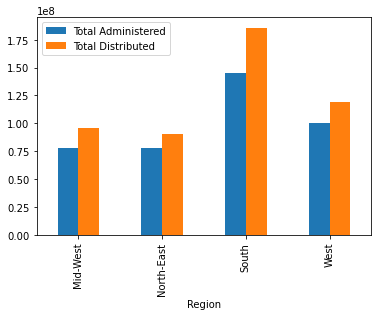

In [34]:

total_agg1.plot.bar()
plt.savefig("Vaccine Distr-Admin by Region.png")

In [35]:
total_agg2 = total_agg1["Region_US_Admin_Ratio"] = round(us_temp.groupby("Region").agg(Total_Administered=("Doses_Administered",'sum'))/us_total*100, 2)

total_agg2["Region_Admin_Dist_Ratio"] = round(total_agg1.loc[:,"Total Administered"]/total_agg1.loc[:,"Total Distributed"]*100,2)

total_agg2=total_agg2.rename(columns={
    'Total_Administered':'Administered Region to US',
    'Region_Admin_Dist_Ratio':'Region Administered to Distributed'})

display(total_agg2)

,Administered Region to US,Region Administered to Distributed
Region,,
Mid-West,19.40,81.83
North-East,19.31,85.69
South,36.04,78.18
West,24.99,84.82


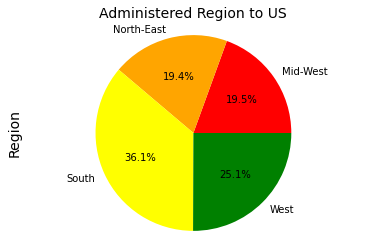

In [103]:
labels = ['Mid-West', 'North-East', 'South', 'West']

sizes = [19.40, 19.31, 36.04, 24.99]

colors = ['red','orange','yellow','green']

plt.pie(sizes,colors=colors, labels=labels, autopct="%1.1f%%")

plt.ylabel('Region', fontsize=14)
plt.title('Administered Region to US',fontsize=14)
plt.axis('equal')
plt.savefig("Visualizations/Pecentage Administered to US by Region.png")
plt.show()


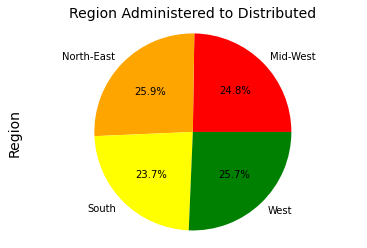

In [102]:
labels = ['Mid-West', 'North-East', 'South', 'West']

sizes = [81.83, 85.69, 78.18, 84.82]

colors = ['red','orange','yellow','green']

plt.pie(sizes,colors=colors, labels=labels, autopct="%1.1f%%")

plt.ylabel('Region', fontsize=14)
plt.title('Region Administered to Distributed',fontsize=14)
plt.axis('equal')
plt.savefig("Visualizations/Pecentage Distributed to US by Region.png")
plt.show()


In [38]:
#administration and distribution data by states in regions
west_df = us_temp.loc[us_temp["Region"] == "West",:]
south_df = us_temp.loc[us_temp["Region"] == "South", :]
midwest_df = us_temp.loc[us_temp["Region"] == "Mid-West", :]
northeast_df = us_temp.loc[us_temp["Region"] == "North-East", :]

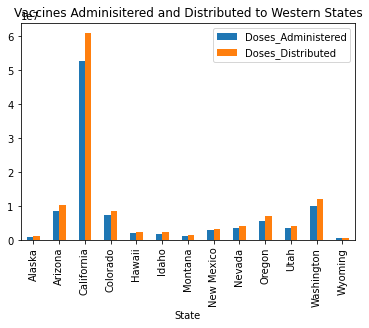

In [101]:
west_df
#new_df=west_df.groupby("State").agg(Total_Administered=("Doses_Administered"))
west_data= west_df[['State', 'Doses_Administered','Doses_Distributed']]
west_data =west_data.set_index(['State'])
west_data.plot.bar()
plt.title("Vaccines Adminisitered and Distributed to Western States")
plt.savefig("Visualizations/Vaccines Adminisitered and Distributed to Western States.png")
plt.show()


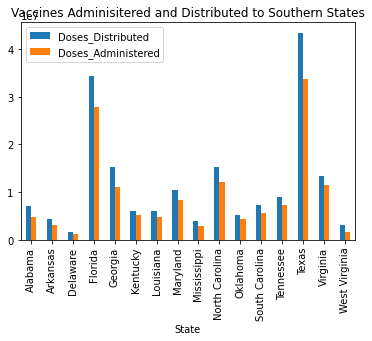

In [100]:
south_df

south_data= south_df[['State','Doses_Distributed','Doses_Administered']]
south_data =south_data.set_index(['State'])
south_data.plot.bar()

plt.title("Vaccines Adminisitered and Distributed to Southern States")
plt.savefig("Visualizations/Vaccines Adminisitered and Distributed to Southern States.png")

plt.show()


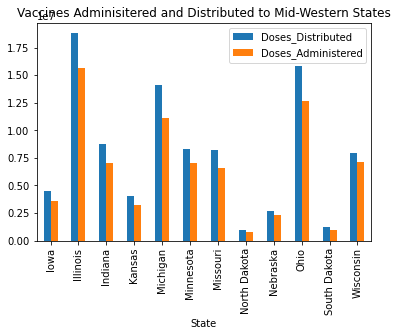

In [99]:
midwest_df

midwest_data= midwest_df[['State', 'Doses_Distributed','Doses_Administered']]
midwest_data =midwest_data.set_index(['State'])
midwest_data.plot.bar()

plt.title("Vaccines Adminisitered and Distributed to Mid-Western States")
plt.savefig("Visualizations/Vaccines Adminisitered and Distributed to Mid-Western States.png")
plt.show()


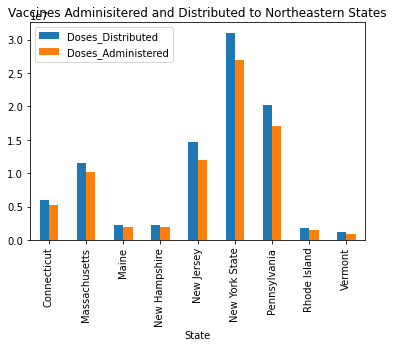

In [97]:
northeast_df

northeast_data= northeast_df[['State', 'Doses_Distributed','Doses_Administered']]
northeast_data =northeast_data.set_index(['State'])
northeast_data.plot.bar()
plt.title("Vaccines Adminisitered and Distributed to Northeastern States")
plt.savefig("Visualizations/Vaccine_Adminisitered_and_Distributed_to_Northeastern_States.png")
plt.show()



In [40]:
# Population Data
populationData = pd.read_csv('Resources/2019_Census_US_Population_Data_By_State_Lat_Long.csv')

# Get the most recent date for filtering
freshDate = date.today() - timedelta(days=1)
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]



In [41]:
# Vaccination data, for most recent date
vaccinationData = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated"]]

# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(populationData, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns="location")

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

vaccinationAndPopulationByLocation

,STATE,POPESTIMATE2019,lat,long,people_vaccinated,percent_vaccinated
0,Alabama,4903185,32.377716,-86.300568,2668028.0,0.544142
1,Alaska,731545,58.301598,-134.420212,434005.0,0.593272
2,Arizona,7278717,33.448143,-112.096962,4448736.0,0.611198
3,Arkansas,3017804,34.746613,-92.288986,1747234.0,0.578975
4,California,39512223,38.576668,-121.493629,29391667.0,0.743863
5,Colorado,5758736,39.739227,-104.984856,3888215.0,0.675185
6,Connecticut,3565287,41.764046,-72.682198,2811535.0,0.788586
7,Delaware,973764,39.157307,-75.519722,669987.0,0.688038
8,District of Columbia,705749,38.895110,-77.036370,524360.0,0.742984
9,Florida,21477737,30.438118,-84.281296,14813872.0,0.689732


In [49]:
#total pop to vaccine administered
totalpop_sum=vaccinationAndPopulationByLocation['POPESTIMATE2019'].sum()
vaccine_total=vaccinationAndPopulationByLocation['people_vaccinated'].sum()
percent_vaccinated=round((vaccine_total/totalpop_sum)*100,2)
vaccine_pop=pd.DataFrame({'Total Population':totalpop_sum,
                         'Total Vaccinated in US':vaccine_total,
                         'Percent Vaccination':percent_vaccinated}, index=[0])
vaccine_pop

,Total Population,Total Vaccinated in US,Percent Vaccination
0,308785962,201626716.0,65.3


In [ ]:
3. Which vaccine was distributed the most?

In [23]:
manufacturer_df=us_vaccine_admin_df.loc[:,['State','Administered_Moderna','Administered_Pfizer', 'Administered_J&J']]

In [24]:
manufacturer_df =manufacturer_df.set_index(['State'])
manufacturer_df 

,Administered_Moderna,Administered_Pfizer,Administered_J&J
State,,,
Alaska,323201,487694,35738
Alabama,2049081,2543054,140547
Arkansas,1330606,1726842,100890
Arizona,3396918,4869225,296712
California,19711065,31240203,1903579
Colorado,2883078,4334110,276794
Connecticut,1892190,3162808,209168
District of Columbia,381966,626950,31380
Delaware,478217,737566,51555


In [25]:
sum_moderna=(manufacturer_df["Administered_Moderna"]).sum()
sum_moderna=(manufacturer_df["Administered_Moderna"]).sum() 

In [26]:
sum_moderna

151081384

In [27]:
sum_pfizer=(manufacturer_df["Administered_Pfizer"]).sum()
sum_pfizer=(manufacturer_df["Administered_Pfizer"]).sum()   

In [28]:
sum_pfizer

236557955

In [29]:
sum_jj=(manufacturer_df["Administered_J&J"]).sum()
sum_jj=(manufacturer_df["Administered_J&J"]).sum()   

In [30]:
sum_jj

15008617

In [31]:
data = [['Administered_Moderna', 151081384], ['Administered_Pfizer', 236557955], ['Administered_J&J', 15008617]]
df = pd.DataFrame(data, columns = ['Vaccine Type', 'Total'])
df

,Vaccine Type,Total
0,Administered_Moderna,151081384
1,Administered_Pfizer,236557955
2,Administered_J&J,15008617


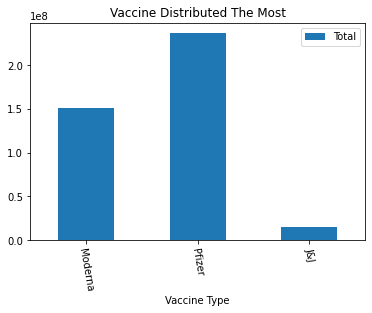

In [104]:
data = {"Vaccine Type":["Moderna", "Pfizer", "J&J"],

        "Total":[151081384,236557955,15008617]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Vaccine Type", y="Total", rot=1000, title="Vaccine Distributed The Most");
plt.savefig("Visualizations/Vaccine Distributed The Most.png")

In [51]:
4. Which population according to age group has a higher percentage of people vaccinated? 

manufacturer_df=us_vaccine_admin_df.loc[:,['State','Additional_Doses_50Plus_Percentage','Additional_Doses_18Plus_Percentage','Additional_Doses_65Plus_Percentage']]

In [52]:
manufacturer_df =manufacturer_df.set_index(['State'])
manufacturer_df 

,Additional_Doses_50Plus_Percentage,Additional_Doses_18Plus_Percentage,Additional_Doses_65Plus_Percentage
State,,,
Alaska,15.6,10.4,21.2
Alabama,9.1,6.5,13.2
Arkansas,10.1,7.2,14.4
Arizona,10.1,6.5,14.7
California,10.3,6.2,16.5
Colorado,14.2,8.5,23.7
Connecticut,11.5,6.8,20.5
District of Columbia,9.1,4.9,14.8
Delaware,10.4,6.8,16.2


In [60]:
Additional_Doses_18Plus_Percentage=(manufacturer_df["Additional_Doses_18Plus_Percentage"]).max()
Additional_Doses_18Plus_Percentage=(manufacturer_df["Additional_Doses_18Plus_Percentage"]).max() 

In [54]:
Additional_Doses_18Plus_Percentage

10.4

In [61]:
Additional_Doses_50Plus_Percentage=(manufacturer_df["Additional_Doses_50Plus_Percentage"]).max()
Additional_Doses_50Plus_Percentage=(manufacturer_df["Additional_Doses_50Plus_Percentage"]).max() 


In [62]:
Additional_Doses_50Plus_Percentage2

10.839215686274509

In [63]:
Additional_Doses_65Plus_Percentage=(manufacturer_df["Additional_Doses_65Plus_Percentage"]).max()
Additional_Doses_65Plus_Percentage=(manufacturer_df["Additional_Doses_65Plus_Percentage"]).max() 


In [64]:
Additional_Doses_65Plus_Percentage

23.7

In [88]:
data = [['Doses_18Plus_Percentage', 10.4], ['Doses_50Plus_Percentage', 15.6], ['Doses_65Plus_Percentage', 23.7]]
df = pd.DataFrame(data, columns = ['Age Group', 'Percentage Total'])
df

,Age Group,Percentage Total
0,Doses_18Plus_Percentage,10.4
1,Doses_50Plus_Percentage,15.6
2,Doses_65Plus_Percentage,23.7


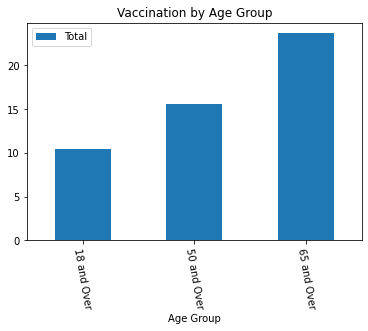

In [105]:
data = {"Age Group":["18 and Over", "50 and Over", "65 and Over"],

        "Total":[10.4,15.6,23.7]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Age Group", y="Total", rot=1000, title="Vaccination by Age Group");
plt.savefig("Visualizations/Vaccination by Age Group.png")